For today remedial test, We would use the 1985 automotive import data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import jupyterthemes as jt
jtplot.style()

Like usual, just read the data first

In [2]:
original = pd.read_csv('auto_imports.csv')

In [3]:
df_prep = original.copy()

In [4]:
df_prep.head(n=5)

,Symboling,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      201 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         201 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 201 non-null object
Stroke               201 non-null object
Compression-ratio    201 non-null float64
Horsepower           201 non-nul

In [6]:
df_prep.describe()

,Symboling,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Size,Compression-ratio,City-MPG,Highway-MPG,Price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [7]:
df_prep.describe(include='object')

,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Engine-Type,Cylinders,Fuel-System,Bore,Stroke,Horsepower,Peak-rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,4800
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [8]:
listItem = []

for col in df_prep.columns:
    listItem.append([
        col, df_prep[col].dtype, df_prep[col].isna().sum(),
        round((df_prep[col].isna().sum()) / len(df_prep[col])),
        df_prep[col].nunique(),
        df_prep[col].sample(2,random_state=101).values
    ])

dfDesc = pd.DataFrame(columns=[
    'data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'
],
    data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,Symboling,int64,0,0.0,6,"[0, 0]"
1,Normalized-Loss,object,0,0.0,52,"[85, 110]"
2,Make,object,0,0.0,22,"[honda, honda]"
3,Fuel-Type,object,0,0.0,2,"[gas, gas]"
4,Aspiration,object,0,0.0,2,"[std, std]"
5,Num-of-Doors,object,0,0.0,3,"[four, four]"
6,Body-Style,object,0,0.0,5,"[sedan, sedan]"
7,Drive-Wheels,object,0,0.0,3,"[fwd, fwd]"
8,Engine-Location,object,0,0.0,2,"[front, front]"
9,Wheel-Base,float64,0,0.0,52,"[96.5, 96.5]"


If you realize, some columns that are numerical is listed as object data type. This is because in the data there is '?' value that become the placeholder of Null value. Now, replace all the '?' in every columns as NaN value (np.nan).

In [9]:
for i in df_prep.columns:
    df_prep[i] = df_prep[i].apply(lambda x : np.nan if x == '?' else x)

In [10]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null object
Stroke               197 non-null object
Compression-ratio    201 non-null float64
Horsepower           199 non-nul

In [11]:
listItem = []

for col in df_prep.columns:
    listItem.append([
        col, df_prep[col].dtype, df_prep[col].isna().sum(),
        round((df_prep[col].isna().sum()) / len(df_prep[col])),
        df_prep[col].nunique(),
        df_prep[col].sample(2,random_state=101).values
    ])

dfDesc = pd.DataFrame(columns=[
    'data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'
],
    data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,Symboling,int64,0,0.0,6,"[0, 0]"
1,Normalized-Loss,object,37,0.0,51,"[85, 110]"
2,Make,object,0,0.0,22,"[honda, honda]"
3,Fuel-Type,object,0,0.0,2,"[gas, gas]"
4,Aspiration,object,0,0.0,2,"[std, std]"
5,Num-of-Doors,object,2,0.0,2,"[four, four]"
6,Body-Style,object,0,0.0,5,"[sedan, sedan]"
7,Drive-Wheels,object,0,0.0,3,"[fwd, fwd]"
8,Engine-Location,object,0,0.0,2,"[front, front]"
9,Wheel-Base,float64,0,0.0,52,"[96.5, 96.5]"


There are 2 columns that would be nice if they are represented as numerical value rather than written; Num-of-Doors and Cylinders. For this 2 columns, replace the string as numerical value (Ex: if it is two then replace it with 2, etc.)

In [12]:
df_prep['Num-of-Doors'].unique()

array(['two', 'four', nan], dtype=object)

In [13]:
df_prep['Cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
Numerical = {'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12}

In [15]:
df_prep['Num-of-Doors']=df_prep['Num-of-Doors'].apply(lambda x: Numerical.get(x) if x in Numerical else x)
df_prep['Cylinders']=df_prep['Cylinders'].apply(lambda x: Numerical.get(x) if x in Numerical else x)

In [16]:
df_prep['Num-of-Doors'].unique()


array([ 2.,  4., nan])

In [17]:
df_prep['Cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

Now convert these following columns into float object:
- Num-of-Doors
- Cylinders
- Bore
- Stroke
- Horsepower
- Peak-rpm

In [18]:
df_prep['Num-of-Doors'] = df_prep['Num-of-Doors'].astype(float)
df_prep['Cylinders'] = df_prep['Cylinders'].astype(float)
df_prep['Bore'] = df_prep['Bore'].astype(float)
df_prep['Stroke'] = df_prep['Stroke'].astype(float)
df_prep['Horsepower'] = df_prep['Horsepower'].astype(float)
df_prep['Peak-rpm'] = df_prep['Peak-rpm'].astype(float)

In [19]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null float64
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null float64
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null float64
Stroke               197 non-null float64
Compression-ratio    201 non-null float64
Horsepower           199 non

We do not need the Symboling and Normalized Columns, so drop these 2 columns. Then, filter the data to acquire the only the row that contain NaN.

In [20]:
df_prep.drop(['Symboling','Normalized-Loss'],axis=1,inplace=True)

In [21]:
df_prep[df_prep.isna().any(axis=1)]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


Now we will try to fill the NaN value for some of the columns.
For the NaN in Num-of-Doors, Bore, and  Stroke columns fill the NaN value with the mean of their columns with the similar value in the Make and Body-Style columns. *e.g if you have NaN in num-of-doors with hatchback renault car then fill the NaN with the num-of-doors mean of the hatchback renault car. 
 

In [22]:
index = []
for row in df_prep[df_prep.isna().any(axis=1)].index:
    index.append(row)

In [23]:
for col in df_prep.columns:
    for idx in index:
        if pd.isna(df_prep.loc[idx,col]):
            df_prep.loc[idx,col] = df_prep.groupby(by=['Body-Style','Make']).mean().loc[df_prep.loc[idx,'Body-Style'],df_prep.loc[idx,'Make']][col]
        

Let's see once more our previous dataframe which contain the NaN to make sure that it have been filled properly

In [24]:
df_prep.loc[index]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,4.0,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,3.21,3.27,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,4.0,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


Now, drop all the rest row that contain the NaN value

In [25]:
df_prep.dropna(inplace=True)

In [27]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 200
Data columns (total 24 columns):
Make                 199 non-null object
Fuel-Type            199 non-null object
Aspiration           199 non-null object
Num-of-Doors         199 non-null float64
Body-Style           199 non-null object
Drive-Wheels         199 non-null object
Engine-Location      199 non-null object
Wheel-Base           199 non-null float64
Length               199 non-null float64
Width                199 non-null float64
Height               199 non-null float64
Curb-Weight          199 non-null int64
Engine-Type          199 non-null object
Cylinders            199 non-null float64
Engine-Size          199 non-null int64
Fuel-System          199 non-null object
Bore                 199 non-null float64
Stroke               199 non-null float64
Compression-ratio    199 non-null float64
Horsepower           199 non-null float64
Peak-rpm             199 non-null float64
City-MPG             199 

As I am interested in the car price, I want to see if the brand of the car ('Make' column) would affecting the price. Let's try to create a visualization of it 

Text(0.5, 1.0, 'Countplot of the car brand')

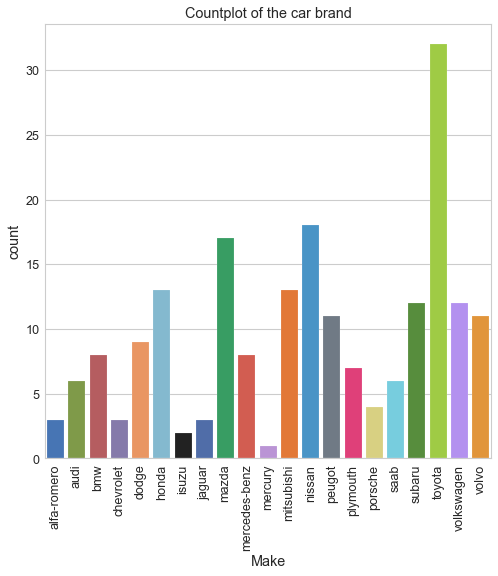

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.countplot(x='Make',data=df_prep)
plt.xticks(rotation=90)
plt.title('Countplot of the car brand')

Text(0.5, 1.0, 'Mean price of each car brand')

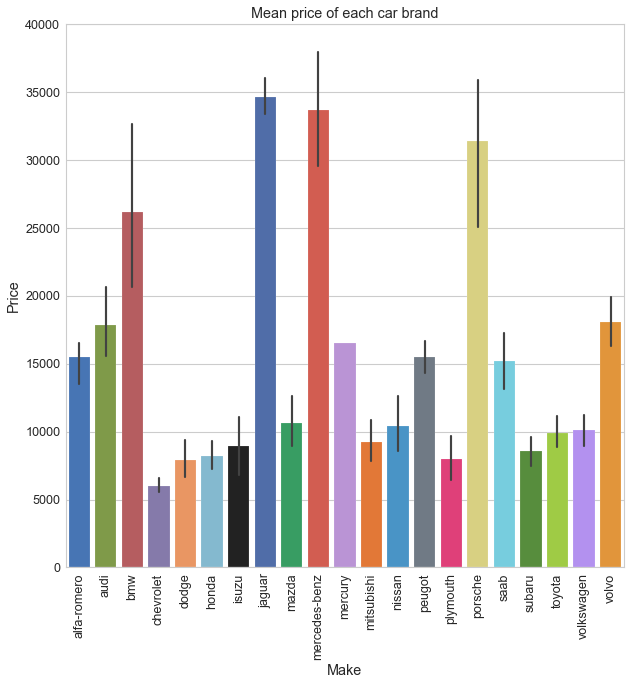

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x='Make',y='Price',data=df_prep)
plt.ylim([0,40000])
plt.xticks(rotation=90)
plt.title('Mean price of each car brand')

Text(0.5, 1.0, 'Car price distribution for each brand')

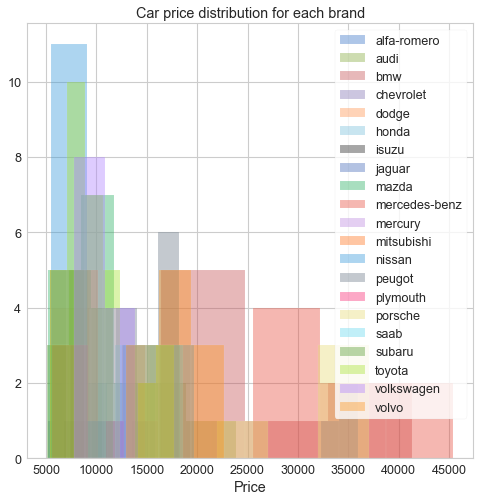

In [31]:
plt.figure(figsize=(8,8))
for i in df_prep['Make'].unique():
    sns.distplot(df_prep[df_prep['Make']==i]['Price'],kde=False,label=i)
plt.legend()
plt.title('Car price distribution for each brand')

## Question 1

Do you think there is a relation between the price column and the Make column? Make you reasoning

In [32]:
from scipy.stats import shapiro, anderson, skew, kurtosis

In [37]:
df_prep['Price'].describe()

count      199.000000
mean     13243.432161
std       7978.707609
min       5118.000000
25%       7775.000000
50%      10345.000000
75%      16501.500000
max      45400.000000
Name: Price, dtype: float64

In [38]:
df_prep['Make'].describe()

count        199
unique        21
top       toyota
freq          32
Name: Make, dtype: object

lets inspect relation between continous data of ['Price'] to the discrete data of['Make'], for now lets check the distribution of the data whether its normal distribution or not with anderson test

In [71]:
for i in df_prep['Make'].unique():
    data = df_prep[df_prep['Make']==i]['Price']
    result = anderson(data)
    print(i, 'x Price','\n')
    print('anderson stat : {}'.format(result[0]))
    if result[0] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
    print(('Median : {}'. format(data.median())))
    print(('Variance : {}'.format(data.var())))
    print(('Skewness: {}, Kurtosis {}'.format(skew(data),kurtosis(data))))
    if data.var()<df_prep['Price'].var():
        print('Strong Association based on variance difference','\n')
    else:
        print('Have no correlation based on variance difference','\n')

alfa-romero x Price 

anderson stat : 0.48776673589398367
Normal Distribution
Median : 16500.0
Variance : 3010008.3333333335
Skewness: -0.7071067811865487, Kurtosis -1.4999999999999991
Strong Association based on variance difference 

audi x Price 

anderson stat : 0.29503360198711803
Normal Distribution
Median : 17580.0
Variance : 11918924.166666668
Skewness: 0.7525180688748201, Kurtosis -0.3123022981299921
Strong Association based on variance difference 

bmw x Price 

anderson stat : 0.36641008164842503
Normal Distribution
Median : 22835.0
Variance : 85818583.92857143
Skewness: 0.5575701237200403, Kurtosis -1.1268184364237732
Have no correlation based on variance difference 

chevrolet x Price 

anderson stat : 0.3147535772279113
Normal Distribution
Median : 6295.0
Variance : 569152.0
Skewness: -0.5991134606787186, Kurtosis -1.5000000000000002
Strong Association based on variance difference 

dodge x Price 

anderson stat : 0.5431018379871144
Normal Distribution
Median : 7609.0
Vari

C:\Users\Fikriem\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Fikriem\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Fikriem\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1869: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
C:\Users\Fikriem\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1957: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Based on the Anderson darling Test, we can conclude that the data between Make variable and Price has normal distribution spread. in order to check the corelation, A simple approach could be to group the continuous variable using the categorical variable, measure the variance in each group and comparing it to the overall variance of the continuous variable. If the variance after grouping falls down significantly, it means that the categorical variable can explain most of the variance of the continuous variable and so the two variables likely have a strong association. If the variables have no correlation, then the variance in the groups is expected to be similar to the original variance. source : https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

Based on the variance difference we can see almost the brand (value in the Make dataframe) has strong association on the price, except for the brand Mercury & BMW. as group we can conclude that the MAKE discrete feature have strong association with Price feature

Create a new column called MPG-difference where the value is coming from the difference between Highway-MPG and City-MPG, then create another column called Car-Area from multipication of Length, Width, and Height columns.

In [72]:
df_prep['MPG-difference'] = df_prep['Highway-MPG'] - df_prep['City-MPG']

In [73]:
df_prep['Car-Area'] = df_prep['Length'] * df_prep['Width'] * df_prep['Height']

In [74]:
df_prep.head()

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,6,528019.904
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,6,528019.904
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,7,587592.640
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,6,634816.956
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,4,636734.832


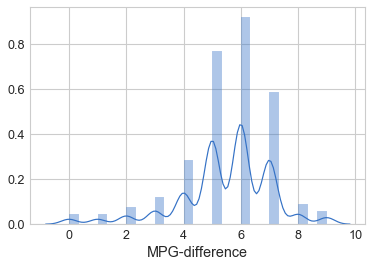

In [76]:
sns.set_style('whitegrid')
sns.distplot(df_prep['MPG-difference'])

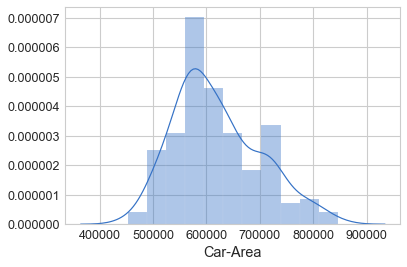

In [78]:
sns.distplot(df_prep['Car-Area'])

Now, use the IQR method to find the row outlier based on the MPG-Difference columns

In [81]:
q1 = df_prep['MPG-difference'].quantile(.25)
q3 = df_prep['MPG-difference'].quantile(.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [82]:
df_prep[(df_prep['MPG-difference'] < low )| (df_prep['MPG-difference'] > up )]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
8,audi,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,71.4,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875,3,769115.802
47,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,3.03,3.15,9.0,68.0,5000.0,30,31,5195,1,552589.302
62,mazda,gas,std,4.0,sedan,rwd,front,104.9,175.0,66.1,...,3.76,3.16,8.0,120.0,5000.0,19,27,18280,8,629272.000
63,mazda,diesel,std,4.0,sedan,rwd,front,104.9,175.0,66.1,...,3.43,3.64,22.0,72.0,4200.0,31,39,18344,8,629272.000
64,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,25552,3,758245.255
65,mercedes-benz,diesel,turbo,4.0,wagon,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,28248,3,787769.849
66,mercedes-benz,diesel,turbo,2.0,hardtop,rwd,front,106.7,187.5,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,28176,3,723650.625
67,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,115.6,202.6,71.7,...,3.58,3.64,21.5,123.0,4350.0,22,25,31600,3,817837.446
68,mercedes-benz,gas,std,4.0,sedan,rwd,front,115.6,202.6,71.7,...,3.46,3.10,8.3,155.0,4750.0,16,18,34184,2,820742.730
69,mercedes-benz,gas,std,2.0,convertible,rwd,front,96.6,180.3,70.5,...,3.46,3.10,8.3,155.0,4750.0,16,18,35056,2,645726.420


In [84]:
df_prep[(df_prep['MPG-difference'] < low )| (df_prep['MPG-difference'] > up )].describe()

,Num-of-Doors,Wheel-Base,Length,Width,Height,Curb-Weight,Cylinders,Engine-Size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,3.241379,102.193103,180.241379,67.406897,54.551724,2909.896552,5.000000,156.000000,3.465517,3.254483,14.720690,117.448276,4917.241379,24.275862,28.448276,20811.448276,4.172414,666796.701655
std,0.987608,9.094305,13.996671,2.863431,2.301338,616.542163,1.414214,59.221738,0.279676,0.289477,6.748459,47.951304,687.681906,7.449336,8.974512,11905.112919,3.263094,100367.760042
min,2.000000,89.500000,159.100000,64.000000,50.200000,1890.000000,4.000000,91.000000,3.010000,2.640000,7.700000,52.000000,4150.000000,14.000000,16.000000,5195.000000,0.000000,552589.302000
25%,2.000000,95.700000,168.900000,65.000000,52.800000,2300.000000,4.000000,108.000000,3.240000,3.080000,9.000000,73.000000,4500.000000,17.000000,25.000000,9298.000000,2.000000,567911.680000
50%,4.000000,97.300000,175.000000,66.100000,54.900000,2756.000000,4.000000,145.000000,3.580000,3.350000,9.500000,112.000000,4800.000000,23.000000,25.000000,18344.000000,3.000000,629272.000000
75%,4.000000,110.000000,190.900000,70.300000,55.900000,3495.000000,6.000000,183.000000,3.700000,3.400000,21.500000,143.000000,5000.000000,30.000000,31.000000,31600.000000,8.000000,769115.802000
max,4.000000,120.900000,208.100000,72.000000,58.700000,3900.000000,8.000000,308.000000,3.940000,3.640000,23.000000,207.000000,6600.000000,38.000000,47.000000,45400.000000,9.000000,846007.659000


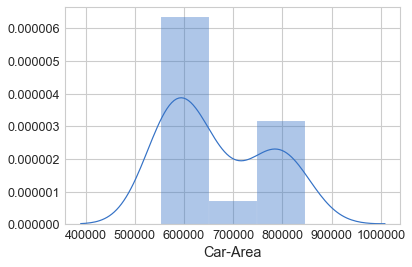

In [85]:
sns.distplot(df_prep[(df_prep['MPG-difference'] < low )| (df_prep['MPG-difference'] > up )]['Car-Area'])

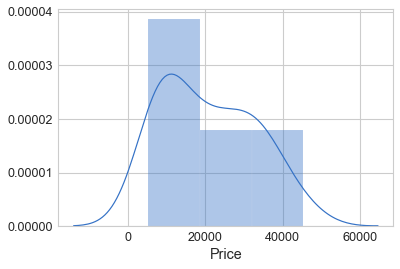

In [86]:
sns.distplot(df_prep[(df_prep['MPG-difference'] < low )| (df_prep['MPG-difference'] > up )]['Price'])

## Question 2

From the describe, and few plots that I see it seems in our outlier based on the MPG-Differences that the car is quite big. Do you agree with my assumption? give me your reasoning

In [88]:
df_outlier_mpg = df_prep[(df_prep['MPG-difference'] < low )| (df_prep['MPG-difference'] > up )]['MPG-difference']
df_noutlier_mpg = df_prep[(df_prep['MPG-difference'] >= low )| (df_prep['MPG-difference'] <= up )]['MPG-difference']

In [97]:
df_outlier_mpg.describe()

count    29.000000
mean      4.172414
std       3.263094
min       0.000000
25%       2.000000
50%       3.000000
75%       8.000000
max       9.000000
Name: MPG-difference, dtype: float64

In [98]:
df_noutlier_mpg.describe()

count    199.000000
mean       5.482412
std        1.601275
min        0.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        9.000000
Name: MPG-difference, dtype: float64

In [96]:
from scipy.stats import kstest
from scipy.stats import ks_2samp
ks_2samp(df_outlier_mpg,df_noutlier_mpg)

Ks_2sampResult(statistic=0.5596950268584301, pvalue=6.314722555966767e-08)

H0: outlier and nonoutlier has no difference.
H1: outlier and nonoutlier has difference.
critical value : 5%

In order to test the differences, we can use kolmogorov smirnoff test due to similar mean, or gini coefficient. in this context we will pursue using kolmogorov smirnoff test. the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous variables. from the p value prespective we can see that the p value for two sample test is below critical level, which then indicate to reject null hypothesis. sample are difference
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html

to further inspect the differences, we will use mannwhitneyu test

In [104]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_outlier_mpg, df_noutlier_mpg)
print(('stat : {}  , Pvalue : {}'.format(stat, p)))
if p < 0.05:
	print('reject Null Hypothesis')
else:
	print('Fail to reject Null Hypothesis')

stat : 2120.5  , Pvalue : 0.009462613753198285
reject Null Hypothesis


H0, the distributions of both populations is not stochastically greater than the other.
H1, the distribution of both population stochastically greater than the other
critical value: 5%

Manwhitneyu test would indicate that one distribution is stochastically greater than the other

due to p value that is lower than critical value, hence we reject null hypothesis. both population stochastically greater than the other

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

What do you think the feature that really affecting the price? give me your explanation with the data


In order to create which feature affecting the price we will separate the feature based on their attribute (continous and discrete).

due to its nature, continous variable have their rank in nature, which means the horsepower 123 would be consider less than horsepower 250. same with width feature, widht of 100 is wider than width 50.

however for the discrete part, we could not determine their rank between each value. there are no meaning to compare BMW to Toyota. as we dont know which one is better, we need to inspect further.

usually we could calculate the weight of evidence for the discrete feature to the price feature. the reason behind it. the discrete variable later would be transform into categorical or dummies. hence it is wise to do coarse classing it with method of weight of evidence

but in this appoarch we will compare cramers value for discrete 


continous feature

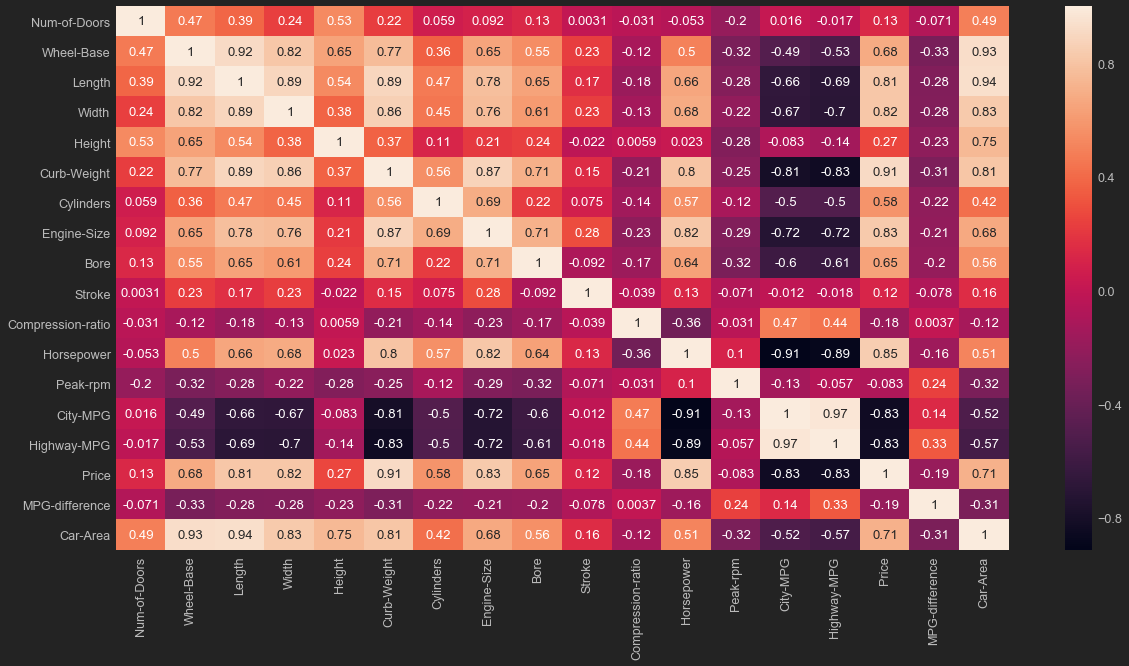

In [110]:
jtplot.style()
plt.figure(figsize=(20,10))
sns.heatmap(df_prep.corr('spearman'), annot =True)

we will use spearman to measure correlation based on the rank of continous variable correlation.

for thee continous feature affecting the price feature, 
the affecting tier would be base on the tier of correlation value

for the price features, curb weight has 0.91 correlation value, Horsepower has 0.85 correlation value, engine size has 0.83 correlation value, boy width has 0.82 correlation value and body length has 0.81 correlation value, and so on rank it to the correlation value from high to low

therefore, the top 5 affecting continous features for price would be in order: 

    the curb weight of the car, 
    the horsepower of the car, 
    engine size of the car 
    and lastly the dimension of the car in terms of width and length.
    
we assume that outlier still present

lets check the discrete data.



In [113]:
categorical_columns = df_prep.select_dtypes('object').columns

In [123]:
categorical_columns

Index(['Make', 'Fuel-Type', 'Aspiration', 'Body-Style', 'Drive-Wheels',
       'Engine-Location', 'Engine-Type', 'Fuel-System'],
      dtype='object')

our approach for association would cramers value for the discrete features. we assume that value under discrete variable has statisfy the mutually exclusive under one feature.

Price                1.000000
Engine-Size          0.873887
Curb-Weight          0.835090
Horsepower           0.810533
Width                0.753871
Cylinders            0.708236
Length               0.693965
Car-Area             0.630859
Wheel-Base           0.583797
Bore                 0.545776
Height               0.134990
Stroke               0.093658
Compression-ratio    0.069549
Num-of-Doors         0.042413
Peak-rpm            -0.101649
MPG-difference      -0.239476
City-MPG            -0.689253
Highway-MPG         -0.705230
Name: Price, dtype: float64

In [139]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [140]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df_prep['Price'], df_prep[i]))

In [141]:
res = pd.DataFrame(data=[categorical_columns, cramers]
                   ).T
res.columns = ['Column', 'Cramers_V']
res.sort_values(by='Cramers_V', ascending=False)

,Column,Cramers_V
5,Engine-Location,0.275939
2,Aspiration,0.243104
7,Fuel-System,0.223377
4,Drive-Wheels,0.192977
6,Engine-Type,0.191374
3,Body-Style,0.185159
0,Make,0.170321
1,Fuel-Type,0.142385


Cramer's V is the most popular of the chi-square-based measures of nominal association
Cramers V may be viewed as the association between two variables as a percentage of their maximum possible variation.

Equal marginals. Cramer's V and all measures which define a perfect relationship in terms of strict monotonicity require that the marginal distribution of the two variables be equal for the coefficient to reach 1.0.
https://www.people.vcu.edu/~pdattalo/702SuppRead/MeasAssoc/NominalAssoc.html

Based on Cramers V value , Engine location features has the highest coeffient of association to the Price Features
followed by Aspiration feature and fuel system and so on based on their coefficient rank.

To create our dashboard, convert your cleaned data as CSV (Just name it as auto_imports_ujian.csv, and don't forget to not including the index) and then export it to your SQL database

In [143]:
df_prep.to_csv('auto_imports_ujian.csv',index=False)